In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('emotion_output.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,label,happy,angry,disgust,sad,fear,neutral,surprise
0,0.0,0.412403,0.010465,1.744201e-05,0.016142,0.016116,0.336955,0.207903
1,0.0,0.491978,0.000753,1.808725e-07,0.005755,0.044377,0.295892,0.161244
2,0.0,0.838704,0.002490,1.275399e-04,0.002721,0.044645,0.075555,0.035757
3,0.0,0.839151,0.000381,3.937046e-07,0.001384,0.015672,0.124571,0.018840
4,0.0,0.295857,0.000482,9.426241e-07,0.006082,0.070931,0.044697,0.581950


In [3]:
df.shape

(634, 8)

In [4]:
y = df['label']
x = df[['happy','angry','disgust','sad','fear','neutral','surprise']]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

# XGBoostClassifier


In [6]:
xreg = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')
xreg.fit(x_train, y_train)

y_train_pred_x = xreg.predict(x_train)
y_test_pred_x = xreg.predict(x_test)

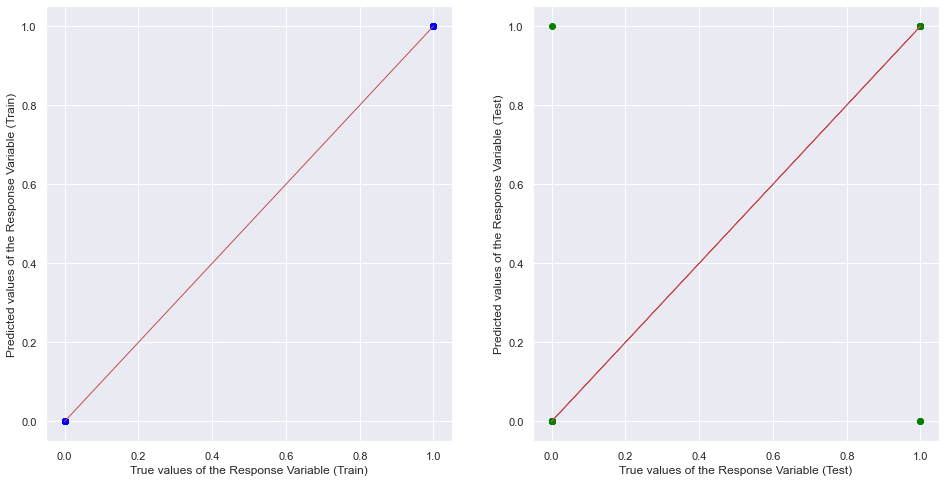

XGBoost's prediction accuracy is: 98.11
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9811320754716981
Mean Squared Error (MSE) 	: 0.018867924528301886

Cross_val_Scores: [0.94736842 0.95789474 0.93684211 0.95789474 0.96842105]


In [7]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_x, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_x, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
#axes[0].set_ylim(0,1)
#axes[1].set_ylim(0,1)
plt.show()

acc_xgb = (y_test_pred_x == y_test).sum().astype(float) / len(y_test_pred_x)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
# Check the Goodness of Fit (on Train Data)
#print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_x))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_x))
print()

scores = cross_val_score(xreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Variable: happy Importance: 0.550000011920929
Variable: sad Importance: 0.12999999523162842
Variable: disgust Importance: 0.09000000357627869
Variable: angry Importance: 0.07999999821186066
Variable: surprise Importance: 0.07999999821186066
Variable: fear Importance: 0.05000000074505806
Variable: neutral Importance: 0.019999999552965164


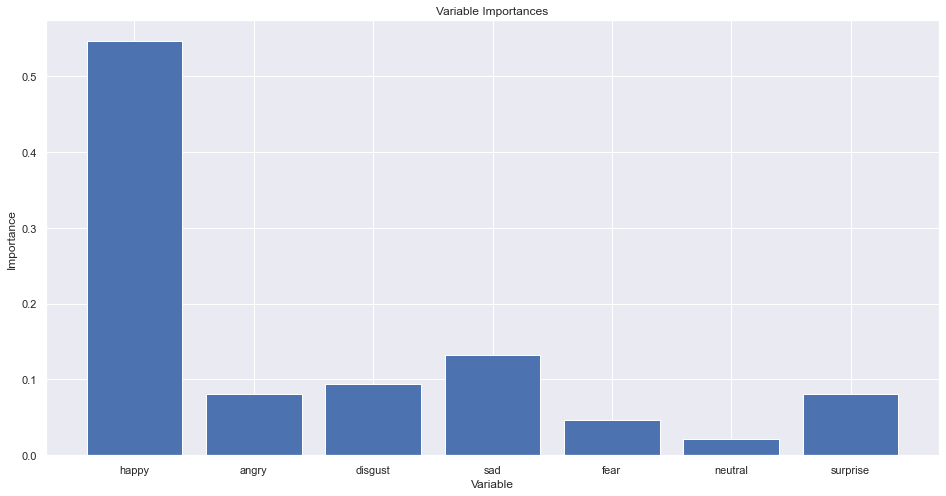

In [8]:
importances = list(xreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');
#plt.ylim(0,0.2)

# Logistic Regression


In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=32)

# fit the model with data
logreg.fit(x_train, y_train)


LogisticRegression(random_state=32)

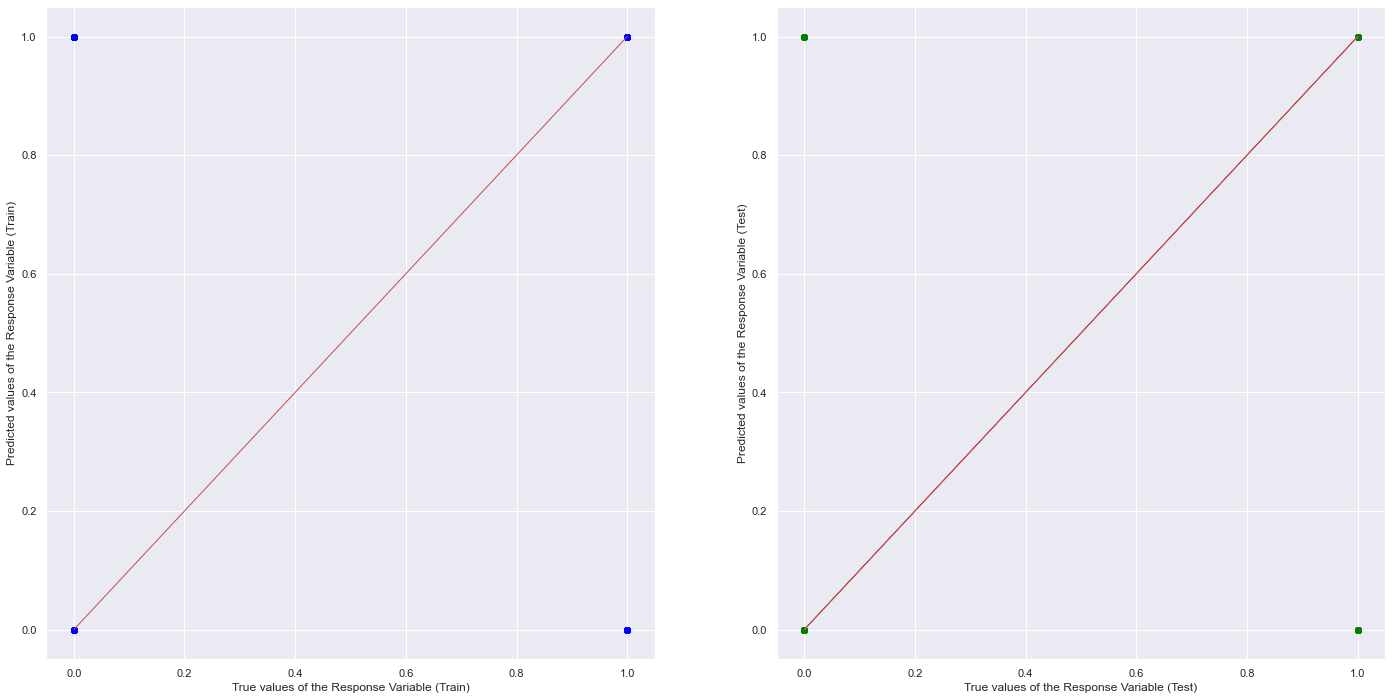

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8736842105263158
Mean Squared Error (MSE) 	: 0.12631578947368421

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9119496855345912
Mean Squared Error (MSE) 	: 0.0880503144654088

Cross_val_Scores: [0.88421053 0.84210526 0.87368421 0.88421053 0.88421053]


In [10]:
from sklearn.metrics import mean_squared_error
%matplotlib inline
# Predict the Total values from Predictors
y_train_pred_log = logreg.predict(x_train)
y_test_pred_log = logreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_log, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_log, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_log))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_log))
print()

scores = cross_val_score(logreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

# Random Forest

In [11]:
# base model 
from sklearn.ensemble import RandomForestClassifier

base = RandomForestClassifier(n_estimators=100)
base.fit(x_train,y_train)

y_train_pred_for = base.predict(x_train)
y_test_pred_for = base.predict(x_test)

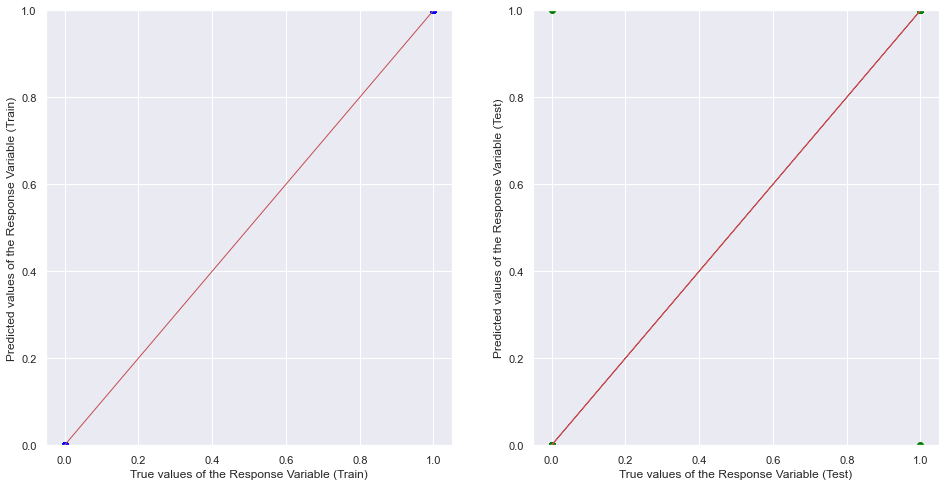

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9874213836477987
Mean Squared Error (MSE) 	: 0.012578616352201259

Cross_val_Scores: [0.91578947 0.94736842 0.93684211 0.93684211 0.92631579]


In [12]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_for, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_for, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[0].set_ylim(0,1)
axes[1].set_ylim(0,1)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_for))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_for))
print()

scores = cross_val_score(base, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Variable: sad Importance: 0.24
Variable: happy Importance: 0.23
Variable: angry Importance: 0.19
Variable: disgust Importance: 0.12
Variable: surprise Importance: 0.11
Variable: fear Importance: 0.05
Variable: neutral Importance: 0.05


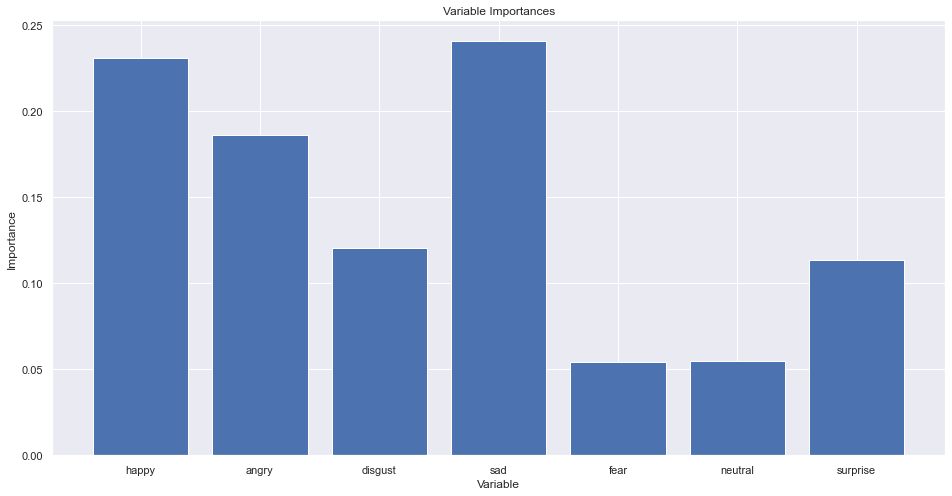

In [13]:
importances = list(base.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');
#plt.ylim(0,0.2)

# Keras

In [14]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras

In [19]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)

y_train_pred_ker = model.predict(x_train)
y_test_pred_ker = model.predict(x_test)

Epoch 1/150
48/48 [==============================] - 0s 812us/step - loss: 0.2392 - accuracy: 0.5621
Epoch 2/150
48/48 [==============================] - 0s 771us/step - loss: 0.2174 - accuracy: 0.7895
Epoch 3/150
48/48 [==============================] - 0s 813us/step - loss: 0.1951 - accuracy: 0.8568
Epoch 4/150
48/48 [==============================] - 0s 792us/step - loss: 0.1709 - accuracy: 0.8632
Epoch 5/150
48/48 [==============================] - 0s 813us/step - loss: 0.1484 - accuracy: 0.8779
Epoch 6/150
48/48 [==============================] - 0s 792us/step - loss: 0.1314 - accuracy: 0.8800
Epoch 7/150
48/48 [==============================] - 0s 813us/step - loss: 0.1194 - accuracy: 0.8779
Epoch 8/150
48/48 [==============================] - 0s 812us/step - loss: 0.1124 - accuracy: 0.8779
Epoch 9/150
48/48 [==============================] - 0s 792us/step - loss: 0.1086 - accuracy: 0.8800
Epoch 10/150
48/48 [==============================] - 0s 750us/step - loss: 0.1061 - accura

48/48 [==============================] - 0s 771us/step - loss: 0.0820 - accuracy: 0.9032
Epoch 82/150
48/48 [==============================] - 0s 750us/step - loss: 0.0822 - accuracy: 0.9032
Epoch 83/150
48/48 [==============================] - 0s 792us/step - loss: 0.0821 - accuracy: 0.9032
Epoch 84/150
48/48 [==============================] - 0s 792us/step - loss: 0.0819 - accuracy: 0.8947
Epoch 85/150
48/48 [==============================] - 0s 771us/step - loss: 0.0814 - accuracy: 0.9011
Epoch 86/150
48/48 [==============================] - 0s 791us/step - loss: 0.0812 - accuracy: 0.9011
Epoch 87/150
48/48 [==============================] - 0s 750us/step - loss: 0.0809 - accuracy: 0.8989
Epoch 88/150
48/48 [==============================] - 0s 771us/step - loss: 0.0807 - accuracy: 0.9053
Epoch 89/150
48/48 [==============================] - 0s 750us/step - loss: 0.0812 - accuracy: 0.9011
Epoch 90/150
48/48 [==============================] - 0s 792us/step - loss: 0.0801 - accuracy: 

In [16]:
y_train_pred_ker_correct = [0 if y_train_pred_ker[i]<0.5 else 1 for i in range(len(y_train_pred_ker))]
y_test_pred_ker_correct = [0 if y_test_pred_ker[i]<0.5 else 1 for i in range(len(y_test_pred_ker))]

In [20]:
from math import sqrt
    
def mse(predicted,actual):
    size = actual.size
    mse = ((predicted-actual)**2).sum()/size
    return mse

def r2(predicted,actual):
    size = actual.size
    mse = ((predicted-actual)**2).sum()/size
    var = ((actual-np.mean(actual))**2).sum()/size
    R2 = 1-mse/var
    return R2

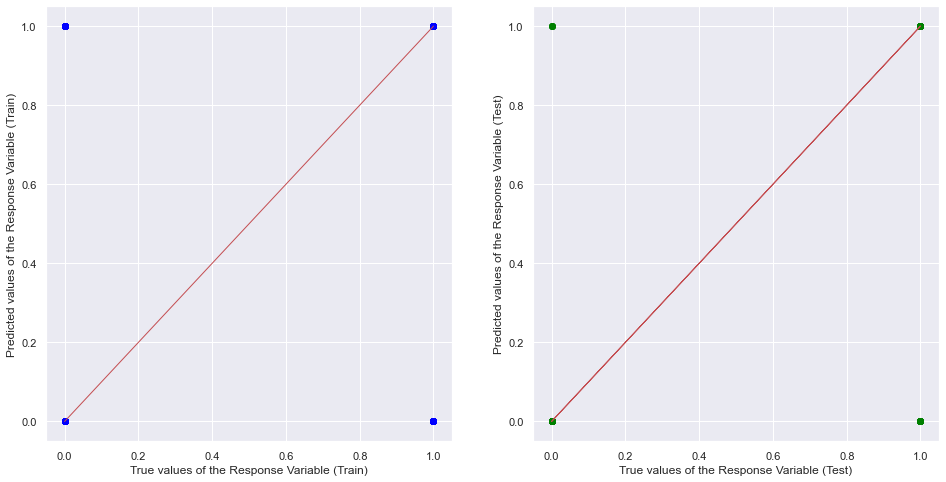

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6210106382978722
Mean Squared Error (MSE) 	: 0.09473684210526316

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7223809523809523
Mean Squared Error (MSE) 	: 0.06918238993710692



In [22]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_ker_correct, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_ker_correct, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
#axes[0].set_ylim(0,1)
#axes[1].set_ylim(0,1)
plt.show()


# evaluate the keras model
#_, accuracy = model.evaluate(x_train, y_train)
#print('Accuracy: %.2f' % (accuracy*100))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2(y_train_pred_ker_correct,y_train))
print("Mean Squared Error (MSE) \t:", mse(y_train_pred_ker_correct,y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2(y_test_pred_ker_correct,y_test))
print("Mean Squared Error (MSE) \t:", mse(y_test_pred_ker_correct,y_test))
print()

#print(model.evaluate(x_train, y_train))
#scores = cross_val_score(model, x_train, y_train, scoring = "accuracy")
#print("Cross_val_Scores:", scores)